In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

plt.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 1.5

In [9]:
def log_likelihood(params):
    mu_y, sigma_y, mu_x, sigma_x = params
    log_likelihood_y_given_x = np.sum(norm.logpdf(y, loc=x * mu_y, scale=sigma_y))
    log_likelihood_x = np.sum(norm.logpdf(x, loc=mu_x, scale=sigma_x))
    return -(log_likelihood_y_given_x + log_likelihood_x)

In [10]:
T = 100   
k = 1 
beta = np.array([1.0])

mu_x, sigma_x = 0, 1
x = np.random.normal(loc=mu_x, scale=sigma_x, size=(T, k))

mu_e, sigma_e = 0, 1
e = np.random.normal(loc=mu_e, scale=sigma_e, size=T)

mu_y, sigma_y = x @ beta, sigma_e
y = x @ beta + e

<AxesSubplot:ylabel='Count'>

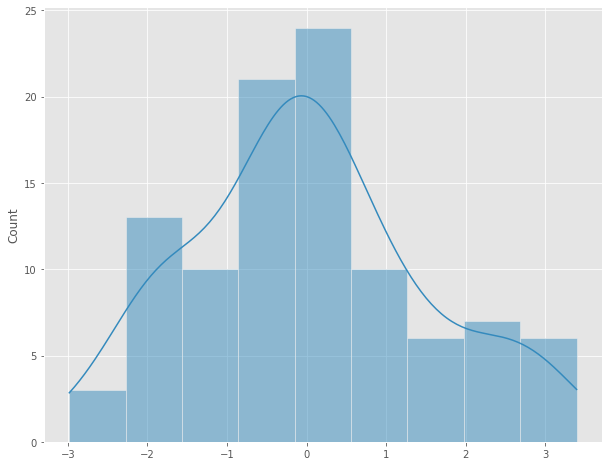

In [11]:
plt.figure(figsize=(10, 8))
sns.histplot(y, kde=True)

In [12]:
initial_params = np.random.uniform(-1, 1, 4)

result = minimize(log_likelihood, initial_params, method='L-BFGS-B', bounds=[(-np.inf, np.inf), (1e-5, np.inf), (-np.inf, np.inf), (1e-5, np.inf)])
mu_y_est, sigma_y_est, mu_x_est, sigma_x_est = result.x